<a href="https://colab.research.google.com/github/jessy-suresh/PRACTICE-QUESTIONS-MACHINE-LEARNING/blob/main/polynomial_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

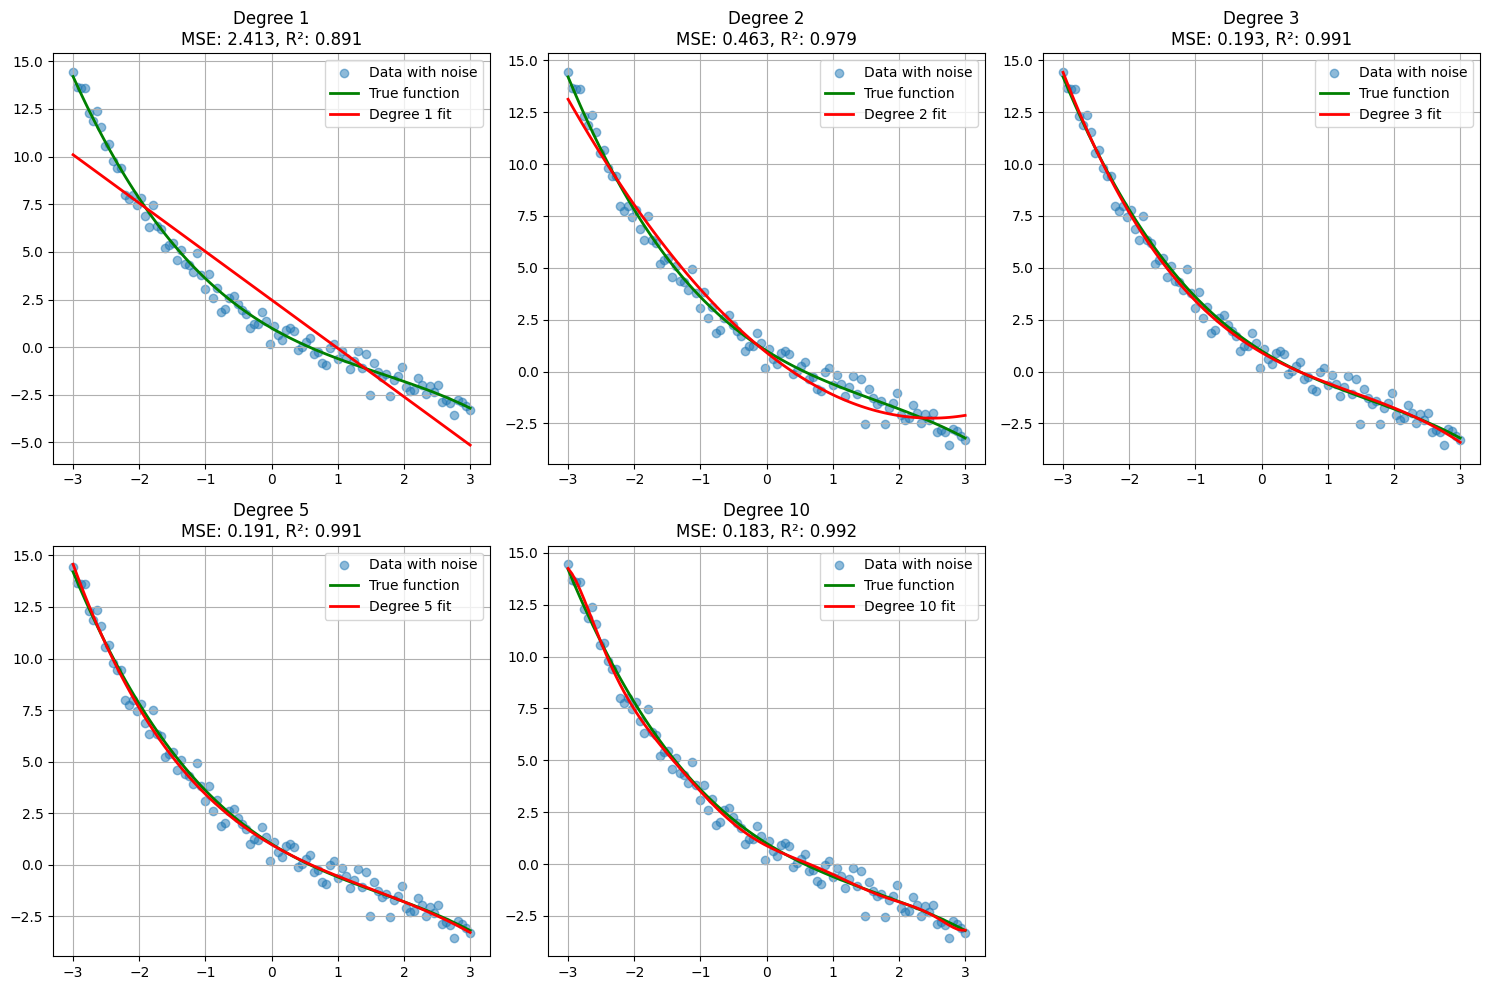

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

class PolynomialCurveFitting:
    """Basic polynomial curve fitting implementation"""

    def __init__(self, degree=2):
        self.degree = degree
        self.coefficients = None
        self.model = None

    def fit(self, X, y):
        """
        Fit polynomial curve using normal equation
        y = β₀ + β₁x + β₂x² + ... + βₙxⁿ
        """
        # Create polynomial features matrix
        X_poly = np.column_stack([X**i for i in range(self.degree + 1)])

        # Normal equation: θ = (X^T X)^(-1) X^T y
        self.coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
        return self

    def predict(self, X):
        """Make predictions"""
        if self.coefficients is None:
            raise ValueError("Model must be fitted first")

        X_poly = np.column_stack([X**i for i in range(self.degree + 1)])
        return X_poly @ self.coefficients

    def get_equation(self):
        """Get the polynomial equation as string"""
        if self.coefficients is None:
            return "Model not fitted"

        terms = []
        for i, coef in enumerate(self.coefficients):
            if i == 0:
                terms.append(f"{coef:.4f}")
            elif i == 1:
                terms.append(f"{coef:.4f}x")
            else:
                terms.append(f"{coef:.4f}x^{i}")

        return "y = " + " + ".join(terms)

# Generate sample data with noise
np.random.seed(42)
n_samples = 100
X = np.linspace(-3, 3, n_samples)
true_coeffs = [1, -2, 0.5, -0.1]  # True polynomial: 1 - 2x + 0.5x² - 0.1x³
y_true = sum(coef * X**i for i, coef in enumerate(true_coeffs))
y = y_true + np.random.normal(0, 0.5, n_samples)  # Add noise

# Test different polynomial degrees
degrees = [1, 2, 3, 5, 10]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Fit polynomial
    poly_fit = PolynomialCurveFitting(degree=degree)
    poly_fit.fit(X, y)
    y_pred = poly_fit.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Plot
    plt.scatter(X, y, alpha=0.5, label='Data with noise')
    plt.plot(X, y_true, 'g-', linewidth=2, label='True function')
    plt.plot(X, y_pred, 'r-', linewidth=2, label=f'Degree {degree} fit')
    plt.title(f'Degree {degree}\nMSE: {mse:.3f}, R²: {r2:.3f}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

=== Polynomial Fitting with Scikit-learn ===


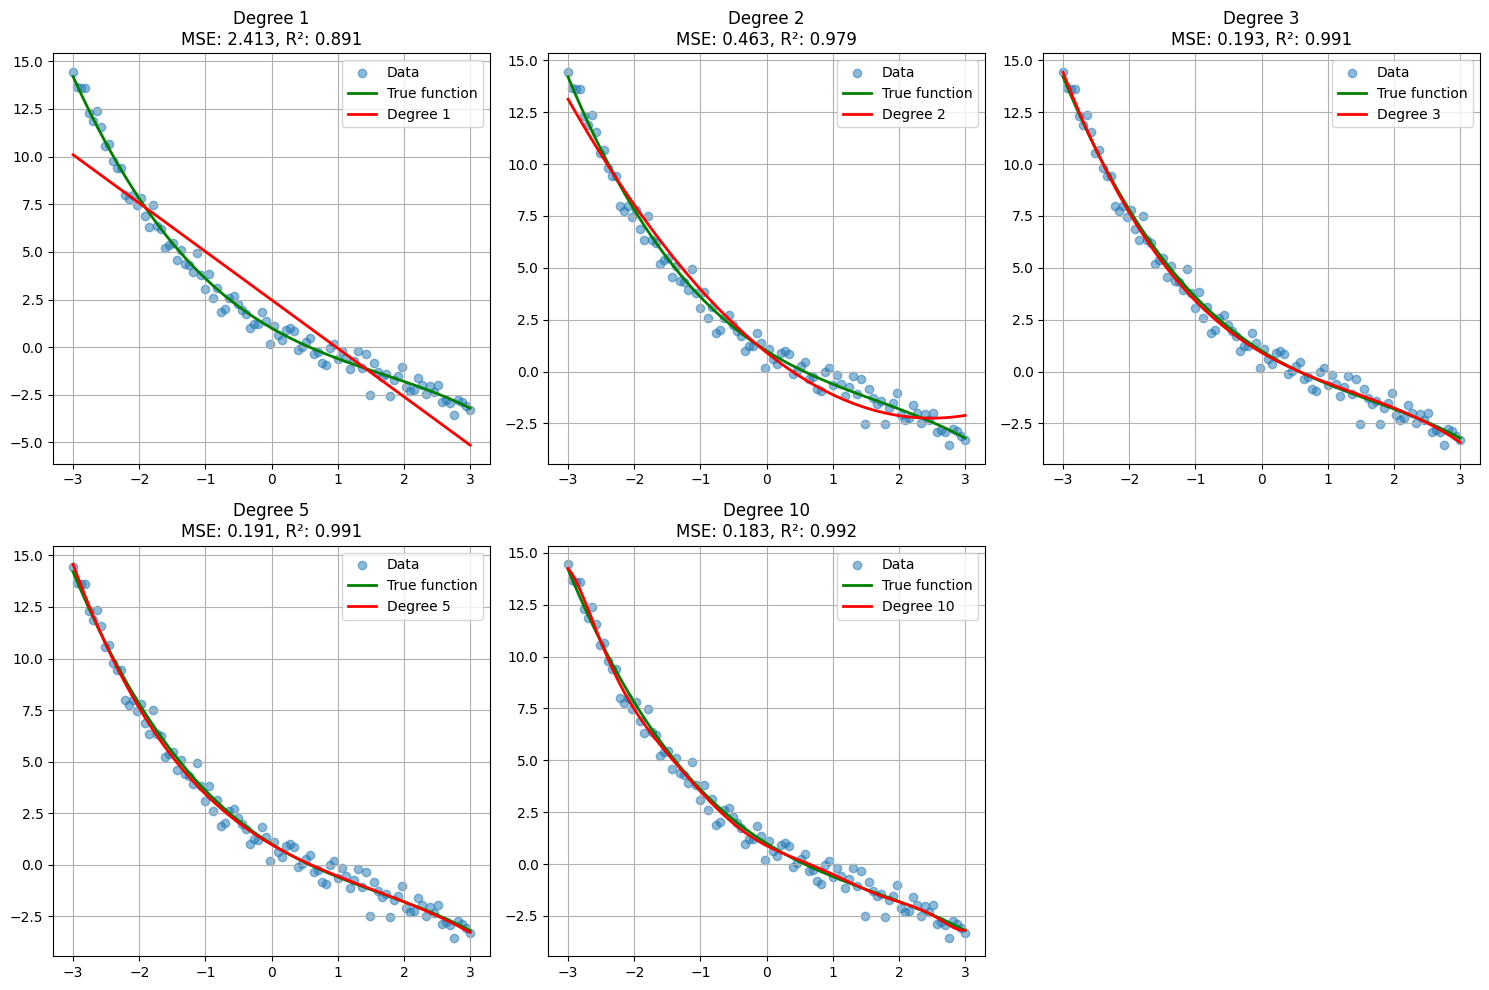


Coefficients for degree 3:
Intercept: 0.9169
Coefficients: [ 0.         -1.85839277  0.51018088 -0.12362099]


In [2]:
def polynomial_fitting_sklearn(X, y, degrees=[1, 2, 3, 5, 10]):
    """Polynomial curve fitting using scikit-learn"""

    results = {}

    plt.figure(figsize=(15, 10))
    X_reshaped = X.reshape(-1, 1)

    for i, degree in enumerate(degrees):
        # Create polynomial regression pipeline
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])

        # Fit model
        model.fit(X_reshaped, y)
        y_pred = model.predict(X_reshaped)

        # Calculate metrics
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Store results
        results[degree] = {
            'model': model,
            'mse': mse,
            'r2': r2,
            'coefficients': model.named_steps['linear'].coef_,
            'intercept': model.named_steps['linear'].intercept_
        }

        # Plot
        plt.subplot(2, 3, i+1)
        plt.scatter(X, y, alpha=0.5, label='Data')
        plt.plot(X, y_true, 'g-', linewidth=2, label='True function')
        plt.plot(X, y_pred, 'r-', linewidth=2, label=f'Degree {degree}')
        plt.title(f'Degree {degree}\nMSE: {mse:.3f}, R²: {r2:.3f}')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    return results

print("=== Polynomial Fitting with Scikit-learn ===")
sklearn_results = polynomial_fitting_sklearn(X, y)

# Show coefficients for degree 3
degree_3_model = sklearn_results[3]['model']
print(f"\nCoefficients for degree 3:")
print(f"Intercept: {sklearn_results[3]['intercept']:.4f}")
print(f"Coefficients: {sklearn_results[3]['coefficients']}")


=== Optimal Degree Selection ===


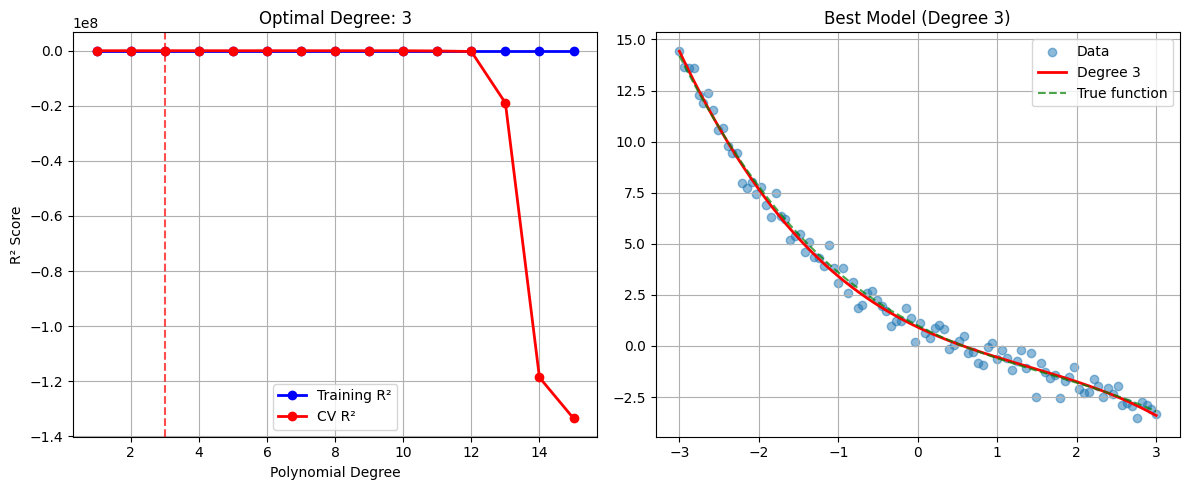

Optimal polynomial degree: 3


In [4]:
from sklearn.model_selection import cross_val_score

def find_optimal_degree(X, y, max_degree=15, cv=5):
    """Find optimal polynomial degree using cross-validation"""

    X_reshaped = X.reshape(-1, 1)
    degrees = range(1, max_degree + 1)
    train_scores = []
    cv_scores = []

    for degree in degrees:
        # Create pipeline
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])

        # Train score
        model.fit(X_reshaped, y)
        y_pred = model.predict(X_reshaped)
        train_score = r2_score(y, y_pred)
        train_scores.append(train_score)

        # Cross-validation score
        cv_score = cross_val_score(model, X_reshaped, y, cv=cv, scoring='r2').mean()
        cv_scores.append(cv_score)

    # Find optimal degree
    optimal_degree = degrees[np.argmax(cv_scores)]

    # Plot results
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(degrees, train_scores, 'bo-', label='Training R²', linewidth=2)
    plt.plot(degrees, cv_scores, 'ro-', label='CV R²', linewidth=2)
    plt.axvline(x=optimal_degree, color='red', linestyle='--', alpha=0.7)
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')
    plt.title(f'Optimal Degree: {optimal_degree}')
    plt.legend()
    plt.grid(True)

    # Plot best model
    plt.subplot(1, 2, 2)
    best_model = Pipeline([
        ('poly', PolynomialFeatures(degree=optimal_degree)),
        ('linear', LinearRegression())
    ])
    best_model.fit(X_reshaped, y)
    X_test = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    y_pred = best_model.predict(X_test)

    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(X_test, y_pred, 'r-', linewidth=2, label=f'Degree {optimal_degree}')
    plt.plot(X, y_true, 'g--', alpha=0.7, label='True function')
    plt.title(f'Best Model (Degree {optimal_degree})')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return optimal_degree, best_model

print("\n=== Optimal Degree Selection ===")
optimal_degree, best_model = find_optimal_degree(X, y, max_degree=15)
print(f"Optimal polynomial degree: {optimal_degree}")


=== Bayesian Polynomial Fitting ===


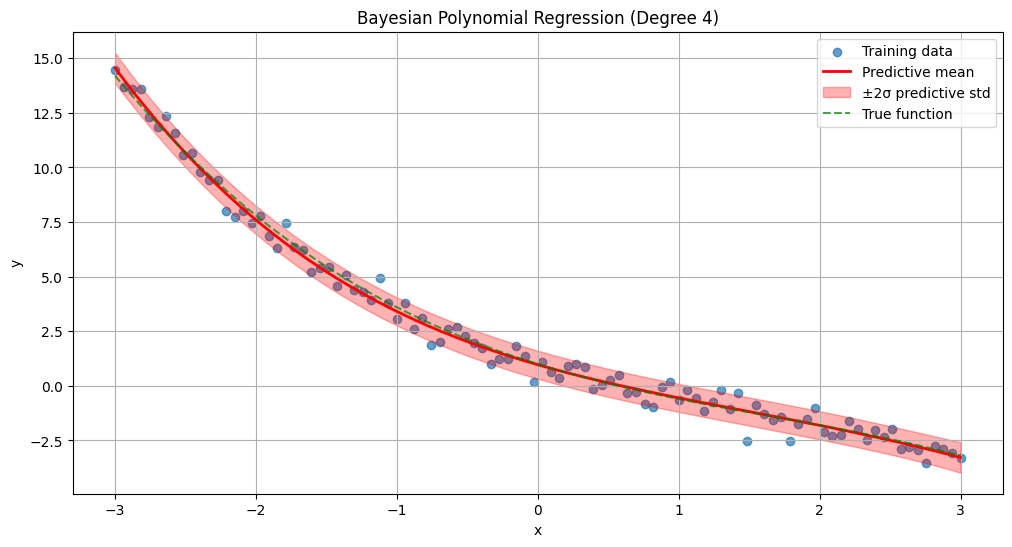

In [5]:
class BayesianPolynomialFitting:
    """Bayesian polynomial curve fitting with uncertainty estimation"""

    def __init__(self, degree=3, alpha=1.0, beta=25.0):
        self.degree = degree
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Noise precision
        self.w_mean = None
        self.w_cov = None

    def fit(self, X, y):
        # Create polynomial features
        X_poly = np.column_stack([X**i for i in range(self.degree + 1)])

        # Bayesian update equations
        # Posterior precision = β * X^T X + α * I
        # Posterior mean = β * (Posterior precision)^(-1) * X^T y

        precision = self.beta * X_poly.T @ X_poly + self.alpha * np.eye(self.degree + 1)
        self.w_cov = np.linalg.inv(precision)
        self.w_mean = self.beta * self.w_cov @ X_poly.T @ y

        return self

    def predict(self, X, return_std=False):
        if self.w_mean is None:
            raise ValueError("Model must be fitted first")

        X_poly = np.column_stack([X**i for i in range(self.degree + 1)])
        y_pred = X_poly @ self.w_mean

        if return_std:
            # Predictive variance
            y_var = 1/self.beta + np.diag(X_poly @ self.w_cov @ X_poly.T)
            y_std = np.sqrt(y_var)
            return y_pred, y_std
        else:
            return y_pred

    def plot_with_uncertainty(self, X_train, y_train, X_range=None):
        """Plot with predictive uncertainty"""
        if X_range is None:
            X_range = np.linspace(X_train.min(), X_train.max(), 200)

        y_pred, y_std = self.predict(X_range, return_std=True)

        plt.figure(figsize=(12, 6))
        plt.scatter(X_train, y_train, alpha=0.7, label='Training data')
        plt.plot(X_range, y_pred, 'r-', linewidth=2, label='Predictive mean')
        plt.fill_between(X_range, y_pred - 2*y_std, y_pred + 2*y_std,
                        alpha=0.3, color='red', label='±2σ predictive std')
        plt.plot(X_range, sum(coef * X_range**i for i, coef in enumerate([1, -2, 0.5, -0.1])),
                'g--', alpha=0.7, label='True function')
        plt.title(f'Bayesian Polynomial Regression (Degree {self.degree})')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

print("\n=== Bayesian Polynomial Fitting ===")
bayesian_poly = BayesianPolynomialFitting(degree=4, alpha=1.0, beta=10.0)
bayesian_poly.fit(X, y)
bayesian_poly.plot_with_uncertainty(X, y)


=== Complete Polynomial Fitting Pipeline ===
Optimal Degree: 4
Mean Squared Error: 0.1941
R² Score: 0.9912


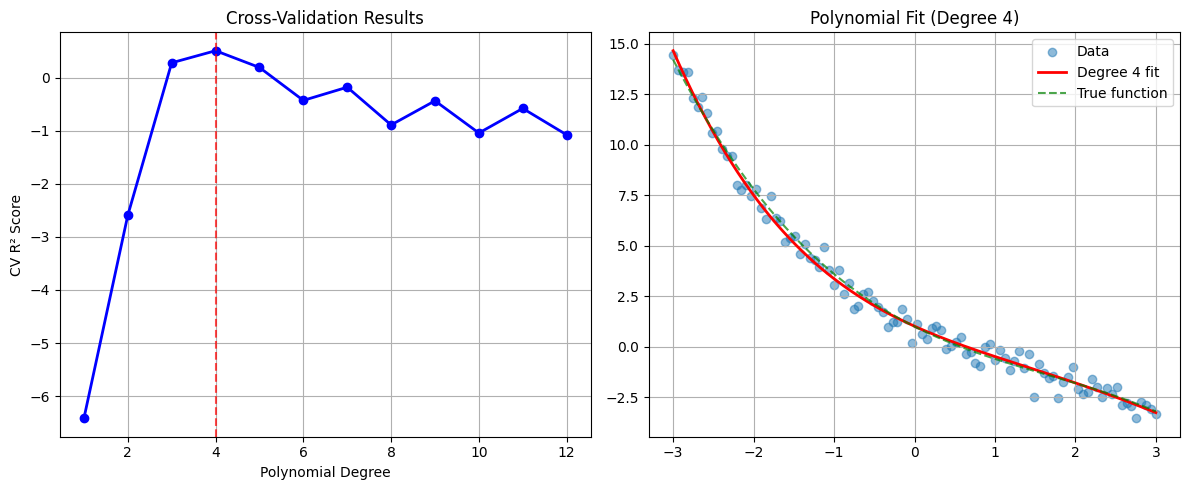


=== Regularization Comparison ===
Optimal Degree: 3
Mean Squared Error: 0.1931
R² Score: 0.9913

Improvement with regularization:
MSE reduction: -0.0010
R² improvement: -0.0000


In [6]:
class PolynomialFittingPipeline:
    """Complete polynomial curve fitting pipeline"""

    def __init__(self, max_degree=10, use_regularization=True, alpha=1.0):
        self.max_degree = max_degree
        self.use_regularization = use_regularization
        self.alpha = alpha
        self.optimal_degree = None
        self.best_model = None
        self.cv_results = None

    def fit(self, X, y):
        X_reshaped = X.reshape(-1, 1)

        # Find optimal degree using cross-validation
        degrees = range(1, self.max_degree + 1)
        cv_scores = []

        for degree in degrees:
            if self.use_regularization:
                model = Pipeline([
                    ('poly', PolynomialFeatures(degree=degree)),
                    ('scaler', StandardScaler()),
                    ('ridge', Ridge(alpha=self.alpha))
                ])
            else:
                model = Pipeline([
                    ('poly', PolynomialFeatures(degree=degree)),
                    ('linear', LinearRegression())
                ])

            cv_score = cross_val_score(model, X_reshaped, y, cv=5, scoring='r2').mean()
            cv_scores.append(cv_score)

        self.optimal_degree = degrees[np.argmax(cv_scores)]
        self.cv_results = list(zip(degrees, cv_scores))

        # Train best model
        if self.use_regularization:
            self.best_model = Pipeline([
                ('poly', PolynomialFeatures(degree=self.optimal_degree)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=self.alpha))
            ])
        else:
            self.best_model = Pipeline([
                ('poly', PolynomialFeatures(degree=self.optimal_degree)),
                ('linear', LinearRegression())
            ])

        self.best_model.fit(X_reshaped, y)
        return self

    def predict(self, X):
        X_reshaped = X.reshape(-1, 1)
        return self.best_model.predict(X_reshaped)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        print(f"Optimal Degree: {self.optimal_degree}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R² Score: {r2:.4f}")

        return mse, r2

    def plot_results(self, X, y, true_function=None):
        """Plot fitting results"""
        X_test = np.linspace(X.min(), X.max(), 300)
        y_pred = self.predict(X_test)

        plt.figure(figsize=(12, 5))

        # Plot 1: CV results
        plt.subplot(1, 2, 1)
        degrees, scores = zip(*self.cv_results)
        plt.plot(degrees, scores, 'bo-', linewidth=2)
        plt.axvline(x=self.optimal_degree, color='red', linestyle='--', alpha=0.7)
        plt.xlabel('Polynomial Degree')
        plt.ylabel('CV R² Score')
        plt.title('Cross-Validation Results')
        plt.grid(True)

        # Plot 2: Fitted curve
        plt.subplot(1, 2, 2)
        plt.scatter(X, y, alpha=0.5, label='Data')
        plt.plot(X_test, y_pred, 'r-', linewidth=2, label=f'Degree {self.optimal_degree} fit')
        if true_function is not None:
            plt.plot(X_test, true_function(X_test), 'g--', alpha=0.7, label='True function')
        plt.title(f'Polynomial Fit (Degree {self.optimal_degree})')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Test complete pipeline
print("\n=== Complete Polynomial Fitting Pipeline ===")

# Define true function for evaluation
def true_function(x):
    return 1 - 2*x + 0.5*x**2 - 0.1*x**3

# Create pipeline
pipeline = PolynomialFittingPipeline(max_degree=12, use_regularization=True, alpha=1.0)
pipeline.fit(X, y)

# Evaluate
mse, r2 = pipeline.evaluate(X, y)

# Plot results
pipeline.plot_results(X, y, true_function=true_function)

# Compare with and without regularization
print("\n=== Regularization Comparison ===")
pipeline_no_reg = PolynomialFittingPipeline(max_degree=12, use_regularization=False)
pipeline_no_reg.fit(X, y)
mse_no_reg, r2_no_reg = pipeline_no_reg.evaluate(X, y)

print(f"\nImprovement with regularization:")
print(f"MSE reduction: {mse_no_reg - mse:.4f}")
print(f"R² improvement: {r2 - r2_no_reg:.4f}")